# 0 - inicjalizacja zbiorów i importy

In [1]:
N=3 # Ilosc uruchomien per rozwiązanie

In [2]:
#imports
from scipy.spatial import distance_matrix
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio
import imageio
import random
from time import time
from tqdm import tqdm

In [3]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa200.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob200.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)

In [4]:
#plotting functions
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance 

In [5]:
# 1st variable - Start cycle - with random assignments
def start_cycle_random(dataset_choice="kroa"):

    cycles={}

    cycles[0]=np.random.choice(200,100,replace=False)
    cycles[1]=np.array([i for i in np.arange(0,200,1) if i not in cycles[0]])
    np.random.shuffle(cycles[1])
    return cycles

# 1 - Najlepsza heurstyka z Lab1 (Metoda rozbudowy cyklu)

In [6]:
def findNewCycle(currentCycle, newV, dist):
    distance = 0
    minNewCycle = None
    minDistance = np.inf
    for i in range(len(currentCycle)+1):
        newCycle = copy.deepcopy(currentCycle)
        newCycle.insert(i, newV)
        distance = calcDistance(newCycle, dist)
        
        if distance < minDistance:
            minDistance = distance 
            minNewCycle = newCycle
        
    return minDistance, minNewCycle

In [7]:


#THE DATASET - który zbior wybieramy
for choice in ["kroa","krob"]:
    #INITIALIZING RESULTS VARIABLES
    results=[]
    min_result=np.inf
    max_result=0
    if choice=="kroa":
        dataset=np_kroa
        dic=kroa
        dist=copy.deepcopy(dista)
        dist_stable=copy.deepcopy(dista)

    else:
        dataset=np_krob
        dic=krob
        dist=copy.deepcopy(distb)
        dist_stable=copy.deepcopy(dista)


    #zmiana dystansu przekątnej na nieskonczonosc
    np.fill_diagonal(dist, np.inf)

    #LOOP TO GATHER ALL RESULTS
    for i in range(0,N):
        print(i)
        cycles={}
        cycles[0]=[]
        cycles[1]=[]
        #mając macierz odległosci dodawac zawsze najblizszy wobec wszystkich i wstawiac go w cykl po tym dla ktorego odleglosc znaleziono

        # select starting vertex
        cycles[0].append(randrange(200))
        cycles[1].append(np.argsort(dist[cycles[0][0]])[-2])
        #print(cycles)
        chosenCycle = 1
        for i in range(198):
            #print(i)
            chosenCycle = (chosenCycle + 1)%2
            minDistance = np.inf
            minVertex = None
            minPath = None

            for vertex in range(len(dist)):
                if vertex in [*cycles[0], *cycles[1]]: 
                    continue
                distance, path = findNewCycle(cycles[chosenCycle], vertex, dist)
                if distance < minDistance:
                    minDistance = distance
                    minVertex = vertex
                    minPath = path
            #print(f"chosenCycle: {chosenCycle}; minVertex: {minVertex}, minDistance: {minDistance}")
            cycles[chosenCycle] = minPath

           # if chosenCycle % 2 == 1:
           #     plotPartResult(dataset, cycles, i)


        #SAVING RESULTS 
        results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
        if results[-1]>max_result:
            max_result=results[-1]
        if results[-1]<min_result:
            min_result=results[-1]
            plt.clf()
            plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
            plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
            plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
            plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
            plt.savefig(f'best_zad2_{choice}.png')



    #SAVING RESULTS
    average_result=np.mean(np.array(results))
    with open(f"zad2_results_{choice}.txt","w") as f:
        f.write(f"{average_result} ({min_result} - {max_result})")

    #SHOWING RESULTS HERE
    print(min_result,max_result,average_result)
    plt.show()


0


KeyboardInterrupt: 

# 2 - Najlepszy czysty Steepest search (bez listy możliwych ruchów ani ruchów kandydackich)

In [8]:
# 1st variable - Start cycle - with nearest neighbour method
def start_cycle_heuristic(dataset_choice="kroa"):
    results=[]
    min_result=np.inf
    max_result=0
    if dataset_choice=="kroa":
        dataset=np_kroa
        dic=kroa
        dist=copy.deepcopy(dista)
        dist_stable=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dic=krob
        dist=copy.deepcopy(distb)
        dist_stable=copy.deepcopy(distb)

    #zmiana dystansu przekątnej na nieskonczonosc
    np.fill_diagonal(dist, np.inf)

    cycles={}
    cycles[0]=[randrange(200)]
    cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

    for b in range(2):
        dist[:,int(cycles[b][0])]=np.inf

    chosenCycle=1
    for i in range(0,198):
        chosenCycle = int((chosenCycle + 1)%2)
        candidates=[]
        for z,index in enumerate(cycles[chosenCycle]):
            candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
        candidates=np.array(candidates)
        x=np.argmin(candidates[:,1])
        cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
        dist[:,int(candidates[x,0])]=np.inf
    
    #SAVING RESULTS 
    results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
    if results[-1]>max_result:
        max_result=results[-1]
    if results[-1]<min_result:
        min_result=results[-1]
    return cycles

In [9]:
# 2nd variable - Find more optimal solution
def steep_search(dist, np_dots, init_random = False, switch="change_edges"):
    #specify cycles initialization.
    cycles = start_cycle_heuristic()
    
    #Define internal change
    internal_change = change_edges
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    finish=False
    
    while not finish:
        
        #-------------calculating possible moves
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves={'external': [combinations]}
        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal']=[combinations]
        #-------------------finished calculating possible moves
        
        currentbestDist=bestDistance
        finish=True
        for k,v in possible_moves.items():
            for value in v[0]:
                new_cycles=copy.deepcopy(cycles)
                #print("BBBBB",value)
                #print("AAA",value)
                if k=="internal":
                    new_cycles=internal_change(new_cycles,value[0],value[1],True)
                elif k=="external":
                    new_cycles=change_vertices(new_cycles,value[0],value[1],False)
                currentDist=calcDistance(new_cycles[0], dist) 
                currentDist+=calcDistance(new_cycles[1], dist)
                if currentbestDist>currentDist:
                    supercycles=copy.deepcopy(new_cycles)
                    currentbestDist=currentDist
        if bestDistance!=currentbestDist:       
            cycles=copy.deepcopy(supercycles)
            bestDistance=currentbestDist
            finish=False
    return cycles,bestDistance

In [10]:
# 3rd variable - Generate neighbour solution
#changes edges internally
def change_edges(cycles, edge1, edge2, internally=False): # dummy internally
    cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
    inA=np.where(cycles[cI] == edge1)[0][0]
    inB=np.where(cycles[cI] == edge2)[0][0]
    inA += 1
    inB += 1
    cycle = cycles[cI]
    cycle[inA: inB] = np.flip(cycle[inA: inB])
    return cycles

In [11]:
#changes vertex externaly between cycles
def change_vertices(cycles, a, b, internally=False):
    if internally:
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI][inB]=tmp
    else:
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        cI2 = 1-cI
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI2] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI2][inB]=tmp
    return cycles

In [47]:
# uruchomienie najlepszego czystego steepest (Heuristic+Steep+Change edges)


dataset_choice = "kroa"
search = steep_search


for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
        
    timeTable = []
    distanceTable = []
    cyclesTable = []
    bestDistance = 0
    for _ in tqdm(range(N)):
        startTime = time()
        cycles, bestDistance = search(dist, dataset, 60, switch=switch)
        distanceTable.append(bestDistance)
        cyclesTable.append(cycles)
        timeTable.append(time() - startTime)
    print(f"RANDOM_- {search.__name__} Switch- {switch} Init_random- {init_random} Dataset- {dataset_choice}; time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")

    plt.savefig(f'RANDOM_best_NN_{search.__name__}_random{init_random}_{switch}_{dataset_choice}.png')


 33%|███▎      | 1/3 [00:17<00:34, 17.09s/it]


KeyboardInterrupt: 

# 3 - Steepest search z listą możliwych ruchów

In [56]:
# 2nd variable - Find more optimal solution
def steep_search_LM(dist, np_dots, init_random = False, switch="change_edges"):
    flag = True
    #specify cycles initialization.
    cycles = start_cycle_random()
#     print(cycles)

    #Define internal change
    internal_change = change_edges

    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    finish=False

    LM = dict()
    #-------------calculating possible moves
    mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
    combinations = mesh.T.reshape(-1, 2)
    possible_moves={'external': combinations}
    mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
    mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
    combinations = mesh.T.reshape(-1, 2)
    possible_moves['internal']=combinations
    #-------------------finished calculating possible moves

    while not finish:
        # Check distance for new possible_moves
        currentbestDist=bestDistance
#         print(currentbestDist)
        finish=True
        for k,v in possible_moves.items():
            for value in v:
                new_cycles=copy.deepcopy(cycles)
                #print("BBBBB",value)
                #print("AAA",value)
                if k=="internal":
                    new_cycles=internal_change(new_cycles,value[0],value[1],True)
                elif k=="external":
                    new_cycles=change_vertices(new_cycles,value[0],value[1],False)
                currentDist=calcDistance(new_cycles[0], dist) 
                currentDist+=calcDistance(new_cycles[1], dist)
                if currentbestDist>currentDist:
                    if k == "external":
                        LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist] 
                    else:
                        cI= 0 if len(np.where(cycles[0] == value[0])[0])!=0 else 1 
                        inA=np.where(cycles[cI] == value[0])[0][0]
                        inB=np.where(cycles[cI] == value[1])[0][0]
                        LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist, cycles[cI][(inA+1)%100], cycles[cI][(inB+1)%100]] 
                elif f"{value[0]},{value[1]},{k}" in LM:
    #                 print("UPSI")
    #                 del LM[f"{value[0]},{value[1]},{k}"]
                    if k == "external":
                        LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist] 
                    else:
                        cI= 0 if len(np.where(cycles[0] == value[0])[0])!=0 else 1 
                        inA=np.where(cycles[cI] == value[0])[0][0]
                        inB=np.where(cycles[cI] == value[1])[0][0]
                        LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist, cycles[cI][(inA+1)%100], cycles[cI][(inB+1)%100]] 
        # Sort LM
        LM = {k: v for k, v in sorted(LM.items(), key=lambda item: item[1][0], reverse=True)}
        possible_moves = {}

        # Aply LM moves
        for k,v in LM.items():
            splitted = k.split(",")
            edge1, edge2 = [int(i) for i in splitted[:2]]
            moveType = splitted[2]
            # Usuwane krawędzie występują w bieżącym rozwiązaniu w różnym od zapamiętanego
            # kierunku – może być aplikowalny w przyszłości
            if moveType == "internal":
                cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
                inA=np.where(cycles[cI] == edge1)[0][0]
    #             try:
                inB=np.where(cycles[cI] == edge2)[0][0]
    #             except:
    #                 continue
                succ1, succ2 = v[1:]

                if cycles[cI][(inA+1)%100] != succ1 or cycles[cI][(inB+1)%100] != succ2: 
                    #print("wrong succesor, continue")
                    continue
            elif moveType == "external":
                pass
    #             inB=np.where(cycles[int(1-cI)] == edge2)[0][0]

            # Usuwane krawędzie występują w bieżącym rozwiązaniu w tym samym kierunku
            # (także obie odrócone)
            if moveType=="internal":
                cycles = internal_change(cycles,edge1,edge2,True)
            elif moveType=="external":
                cycles = change_vertices(cycles,edge1,edge2,False)
#             print(edge1, edge2, moveType)

            bestDistance = calcDistance(cycles[0], dist) 
            bestDistance += calcDistance(cycles[1], dist)

            # Usuwane krawędzie nie występują już w bieżącym rozwiązaniu 
            # removed when move aplied

            LMCopy = copy.deepcopy(LM)
            for k,v in LMCopy.items():
                splitted = k.split(",")
                e1, e2 = [int(i) for i in splitted[:2]]
                mType = splitted[2]
                if moveType == "internal":
                    continue
                elif moveType == "external":
                    if edge1 in [e1,e2]:
    #                     print(f"{e1},{e2},{mType}")
                        if f"{e1},{e2},{mType}" in LM:
                            del LM[f"{e1},{e2},{mType}"] 
                        if f"{e2},{e1},{mType}" in LM:
                            del LM[f"{e2},{e1},{mType}"] 

                    if str(edge1) in k and 'internal' in k:
                        if k in LM:
                            del LM[k] 

                    if edge2 in [e1,e2]:
    #                     print(f"{e1},{e2},{mType}")
                        if f"{e1},{e2},{mType}" in LM:
                            del LM[f"{e1},{e2},{mType}"]
                        if f"{e2},{e1},{mType}" in LM:
                            del LM[f"{e2},{e1},{mType}"]
                    if str(edge2) in k and 'internal' in k:
                        if k in LM:
                            del LM[k]




            # move executed, break
            #print("Move executed")

            break


        # Find new possible_moves
        possible_moves = { "external":[], "internal":[]}
        if moveType == "internal":
            #possible_moves = { 'internal':[] }
            cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
            cI2 = 1-cI

            mesh = np.array(np.meshgrid(edge1, cycles[cI]))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)
            mesh = np.array(np.meshgrid(cycles[cI], edge1))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)

            mesh2 = np.array(np.meshgrid(edge2, cycles[cI]))
            combinations = mesh2.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)
            mesh2 = np.array(np.meshgrid(cycles[cI], edge2))
            combinations = mesh2.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)

            mesh = np.array(np.meshgrid(edge1, cycles[cI2]))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['external'].extend(combinations)
            mesh2 = np.array(np.meshgrid(edge2, cycles[cI2]))
            combinations = mesh2.T.reshape(-1, 2)
            possible_moves['external'].extend(combinations)


        if moveType == "external":
            #possible_moves = { "external":[], "internal":[]}
            cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
            cI2 = 1-cI
        #         inA=np.where(cycles[cI] == edge1)[0][0]
        #         inB=np.where(cycles[cI2] == edge2)[0][0]
            mesh = np.array(np.meshgrid(edge1, cycles[cI2]))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['external'].extend(combinations)
            mesh2 = np.array(np.meshgrid(edge2, cycles[cI]))
            combinations = mesh2.T.reshape(-1, 2)
            possible_moves['external'].extend(combinations)

            mesh = np.array(np.meshgrid(edge1, cycles[cI]))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)
            mesh2 = np.array(np.meshgrid(edge2, cycles[cI2]))
            combinations = mesh2.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)

            mesh = np.array(np.meshgrid(cycles[cI], edge1))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)
            mesh2 = np.array(np.meshgrid(cycles[cI2], edge2))
            combinations = mesh2.T.reshape(-1, 2)
            possible_moves['internal'].extend(combinations)




        for k,v in LM.items():
            splitted = k.split(",")
            e1, e2 = [int(i) for i in splitted[:2]]
            mType = splitted[2]

            possible_moves[mType].append([e1, e2])
    #     LM = {}
    #     print(len(possible_moves['internal']), len(possible_moves['external']))



        if bestDistance < 45000 and flag == True:
            flag = False
            #-------------calculating possible moves
            mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
            combinations = mesh.T.reshape(-1, 2)
            possible_moves={'external': combinations}
            mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
            mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
            combinations = mesh.T.reshape(-1, 2)
            possible_moves['internal']=combinations
            #-------------------finished calculating possible moves


        # if nothing changed then DONE
        if bestDistance!=currentbestDist:       
    #         cycles=copy.deepcopy(supercycles)
    #         bestDistance=currentbestDist
            finish=False
    return cycles,bestDistance

{0: array([ 26,  55, 137,  59,  47, 146, 153, 147, 127, 139,  97, 180,  41,
       117,  33, 188,  54,  82, 159,  22, 198,  73, 176, 138,  75,  45,
        72,  74, 115,  67,  39,  71,  63, 160,  16,  84,   9,  66, 199,
        99,  25, 158,   1, 167, 195, 130,  51, 196,  87, 154,   7,  88,
        76,  85, 175, 149,  64,  92,  77, 116, 101,  81, 150,   6, 112,
        83, 136, 168, 174, 119, 192,  46, 134,  50, 102, 197,  35, 120,
        10,  14, 185,  91, 124, 179,  98,  78,  24, 151,  48,  69, 113,
        27,  95,  42,  61,   4,  65,  94, 171, 182]), 1: array([ 58, 142, 183, 109, 161, 193, 121,  49, 135,  11,  89, 141,  31,
       190,  96, 157,  62, 123,  68, 110, 131, 184, 173,  36, 111, 181,
       169,  13,  23,  57, 145,   2, 172, 118, 132, 125, 162,  18, 155,
       191,  12, 166,  93,  43,  19,   3,  30,  70,  53, 140, 100,  90,
       126, 106,  15,  37, 187,   8, 103, 129,  17, 104,  29, 107, 164,
       189,  21, 170,   0, 144,  86, 114, 148, 177, 152,  38,   5, 128,
   

79 76 internal
42676.18761394611
22 172 external
42546.55401523914
118 91 internal
42425.15840295027
66 30 external
42344.17793296298
53 5 internal
42271.74755906227
80 99 external
42203.58050338185
110 135 internal
42140.38669573293
135 31 external
42054.00576730714
127 59 internal
41994.68212185142
188 130 external
41957.16436297258
86 165 internal
41924.81433178764
47 165 internal
41877.0065268837
117 123 internal
41729.60741057896
29 160 internal
41622.58277732958
29 67 internal
41404.16325142089
62 178 internal
41338.51521739084
92 148 internal
41219.38954480132
140 170 internal
41183.233830834986
199 170 internal
41156.31336374808
58 40 internal
41137.62266773429
40 29 internal
40846.56816397653
126 134 internal
40828.8240616617
122 14 external
40813.4751591239
122 197 external
40789.27761539856
88 163 internal
40775.13791191899
88 153 internal
40744.74925844212
107 73 internal
40735.103919880596
38 27 external
40725.61024838296
188 2 internal
40721.077589574415
188 2 internal


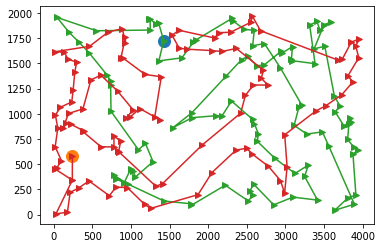

In [53]:
dataset_choice = "kroa"
init_random = False

if dataset_choice=="kroa":
    dataset=np_kroa
    dist=copy.deepcopy(dista)
else:
    dataset=np_krob
    dist=copy.deepcopy(distb)

###########################################################
flag = True
#specify cycles initialization.
cycles = start_cycle_random()
print(cycles)

#Define internal change
internal_change = change_edges

bestDistance = 0
bestDistance += calcDistance(cycles[0], dist) 
bestDistance += calcDistance(cycles[1], dist) 
finish=False

LM = dict()
#-------------calculating possible moves
mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
combinations = mesh.T.reshape(-1, 2)
possible_moves={'external': combinations}
mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
combinations = mesh.T.reshape(-1, 2)
possible_moves['internal']=combinations
#-------------------finished calculating possible moves

while not finish:
    # Check distance for new possible_moves
    currentbestDist=bestDistance
    print(currentbestDist)
    finish=True
    for k,v in possible_moves.items():
        for value in v:
            new_cycles=copy.deepcopy(cycles)
            #print("BBBBB",value)
            #print("AAA",value)
            if k=="internal":
                new_cycles=internal_change(new_cycles,value[0],value[1],True)
            elif k=="external":
                new_cycles=change_vertices(new_cycles,value[0],value[1],False)
            currentDist=calcDistance(new_cycles[0], dist) 
            currentDist+=calcDistance(new_cycles[1], dist)
            if currentbestDist>currentDist:
                if k == "external":
                    LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist] 
                else:
                    cI= 0 if len(np.where(cycles[0] == value[0])[0])!=0 else 1 
                    inA=np.where(cycles[cI] == value[0])[0][0]
                    inB=np.where(cycles[cI] == value[1])[0][0]
                    LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist, cycles[cI][(inA+1)%100], cycles[cI][(inB+1)%100]] 
            elif f"{value[0]},{value[1]},{k}" in LM:
#                 print("UPSI")
#                 del LM[f"{value[0]},{value[1]},{k}"]
                if k == "external":
                    LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist] 
                else:
                    cI= 0 if len(np.where(cycles[0] == value[0])[0])!=0 else 1 
                    inA=np.where(cycles[cI] == value[0])[0][0]
                    inB=np.where(cycles[cI] == value[1])[0][0]
                    LM[f"{value[0]},{value[1]},{k}"] = [currentbestDist - currentDist, cycles[cI][(inA+1)%100], cycles[cI][(inB+1)%100]] 
    # Sort LM
    LM = {k: v for k, v in sorted(LM.items(), key=lambda item: item[1][0], reverse=True)}
    possible_moves = {}
    
    # Aply LM moves
    for k,v in LM.items():
        splitted = k.split(",")
        edge1, edge2 = [int(i) for i in splitted[:2]]
        moveType = splitted[2]
        # Usuwane krawędzie występują w bieżącym rozwiązaniu w różnym od zapamiętanego
        # kierunku – może być aplikowalny w przyszłości
        if moveType == "internal":
            cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
            inA=np.where(cycles[cI] == edge1)[0][0]
#             try:
            inB=np.where(cycles[cI] == edge2)[0][0]
#             except:
#                 continue
            succ1, succ2 = v[1:]
            
            if cycles[cI][(inA+1)%100] != succ1 or cycles[cI][(inB+1)%100] != succ2: 
                #print("wrong succesor, continue")
                continue
        elif moveType == "external":
            pass
#             inB=np.where(cycles[int(1-cI)] == edge2)[0][0]
        
        # Usuwane krawędzie występują w bieżącym rozwiązaniu w tym samym kierunku
        # (także obie odrócone)
        if moveType=="internal":
            cycles = internal_change(cycles,edge1,edge2,True)
        elif moveType=="external":
            cycles = change_vertices(cycles,edge1,edge2,False)
        print(edge1, edge2, moveType)
        
        bestDistance = calcDistance(cycles[0], dist) 
        bestDistance += calcDistance(cycles[1], dist)
        
        # Usuwane krawędzie nie występują już w bieżącym rozwiązaniu 
        # removed when move aplied
        
        LMCopy = copy.deepcopy(LM)
        for k,v in LMCopy.items():
            splitted = k.split(",")
            e1, e2 = [int(i) for i in splitted[:2]]
            mType = splitted[2]
            if moveType == "internal":
                continue
            elif moveType == "external":
                if edge1 in [e1,e2]:
#                     print(f"{e1},{e2},{mType}")
                    if f"{e1},{e2},{mType}" in LM:
                        del LM[f"{e1},{e2},{mType}"] 
                    if f"{e2},{e1},{mType}" in LM:
                        del LM[f"{e2},{e1},{mType}"] 
                        
                if str(edge1) in k and 'internal' in k:
                    if k in LM:
                        del LM[k] 

                if edge2 in [e1,e2]:
#                     print(f"{e1},{e2},{mType}")
                    if f"{e1},{e2},{mType}" in LM:
                        del LM[f"{e1},{e2},{mType}"]
                    if f"{e2},{e1},{mType}" in LM:
                        del LM[f"{e2},{e1},{mType}"]
                if str(edge2) in k and 'internal' in k:
                    if k in LM:
                        del LM[k]
                    
                
                
        
        # move executed, break
        #print("Move executed")
        
        break
    
    
    # Find new possible_moves
    possible_moves = { "external":[], "internal":[]}
    if moveType == "internal":
        #possible_moves = { 'internal':[] }
        cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
        cI2 = 1-cI
        
        mesh = np.array(np.meshgrid(edge1, cycles[cI]))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        mesh = np.array(np.meshgrid(cycles[cI], edge1))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        
        mesh2 = np.array(np.meshgrid(edge2, cycles[cI]))
        combinations = mesh2.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        mesh2 = np.array(np.meshgrid(cycles[cI], edge2))
        combinations = mesh2.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        
        mesh = np.array(np.meshgrid(edge1, cycles[cI2]))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['external'].extend(combinations)
        mesh2 = np.array(np.meshgrid(edge2, cycles[cI2]))
        combinations = mesh2.T.reshape(-1, 2)
        possible_moves['external'].extend(combinations)
    
    
    if moveType == "external":
        #possible_moves = { "external":[], "internal":[]}
        cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
        cI2 = 1-cI
    #         inA=np.where(cycles[cI] == edge1)[0][0]
    #         inB=np.where(cycles[cI2] == edge2)[0][0]
        mesh = np.array(np.meshgrid(edge1, cycles[cI2]))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['external'].extend(combinations)
        mesh2 = np.array(np.meshgrid(edge2, cycles[cI]))
        combinations = mesh2.T.reshape(-1, 2)
        possible_moves['external'].extend(combinations)
        
        mesh = np.array(np.meshgrid(edge1, cycles[cI]))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        mesh2 = np.array(np.meshgrid(edge2, cycles[cI2]))
        combinations = mesh2.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        
        mesh = np.array(np.meshgrid(cycles[cI], edge1))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        mesh2 = np.array(np.meshgrid(cycles[cI2], edge2))
        combinations = mesh2.T.reshape(-1, 2)
        possible_moves['internal'].extend(combinations)
        
        
    
    
    for k,v in LM.items():
        splitted = k.split(",")
        e1, e2 = [int(i) for i in splitted[:2]]
        mType = splitted[2]

        possible_moves[mType].append([e1, e2])
#     LM = {}
#     print(len(possible_moves['internal']), len(possible_moves['external']))
   


    if bestDistance < 45000 and flag == True:
        flag = False
        #-------------calculating possible moves
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        possible_moves={'external': combinations}
        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal']=combinations
        #-------------------finished calculating possible moves


    # if nothing changed then DONE
    if bestDistance!=currentbestDist:       
#         cycles=copy.deepcopy(supercycles)
#         bestDistance=currentbestDist
        finish=False

plt.clf()
plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")

In [41]:
Zainicjuj LM – listę ruchów przynoszących poprawę uporządkowaną od najlepszego do najgorszego
Wygeneruj rozwiązanie startowe x
Zainicjum listę nowych ruchów, przez wzięcie pod uwagę kompbinację wszystkich możliwych ruchów
powtarzaj
    przejrzyj wszystkie nowe ruchy i dodaj do LM ruchy przynoszące poprawę
    Przeglądaj ruchy m z LM od najlepszego do znalezienia aplikowalnego ruchu
        Sprawdź czy m jest aplikowalny i jeżeli nie, usuń go z LM
    jeżeli znaleziono ruch m to
        x := m(x) (zaakceptuj m(x))
    dodaj do listy nowych ruchów kombinacje wierzchołków, gdzie zmieniły się jakieś krawędzie
dopóki nie znaleziono ruchu m po przejrzeniu całej listy LM

array([ 55, 148])

In [42]:
cycles

{0: array([194,  29,  56,  82, 133,  90, 185,  52, 178, 118,   2,   1, 136,
         79, 122, 180, 119, 142,  89,  19, 123, 193,   8,  54,  40,   5,
        182, 130,  72, 143, 138, 111, 192,  27,  84, 108,  30, 188,  48,
         91,   3,  51, 120, 104,  70, 165,  98, 197,  13, 139, 125,  36,
         77, 146,  95, 152,  47,  10,  92, 181,  87,  24,  78,  65, 100,
        127,  69, 147, 172,  80, 158,   7, 159,  41,  61,  96, 190,  33,
        113,  20, 176, 134,  97,  37, 175, 195, 154, 170,  49, 129, 157,
        155, 164,  73,  66, 186,  31,   9, 101, 132]),
 1: array([148, 121,  28,  18, 196, 161, 198,  44, 103, 140, 102, 145, 151,
        156, 106,  53,   4,  46,  12, 135, 187,  50, 107,  21,  57,  55,
         74, 126, 177,   0,  15, 124,  39, 110, 173, 117, 171, 114,  23,
        179, 109,  59, 115,  68,  32,  25,   6, 144,  81, 184, 160, 168,
         94,  85,  34,  42, 199, 112, 167, 153, 131, 169,  62, 166,  60,
         45,  83,  86,  43, 137,  16,  67,  99, 105,  11, 150, 

In [18]:
0 if len(np.where(cycles[0] == 2)[0])!=0 else 1

1

In [21]:
cycles[0]==2

False

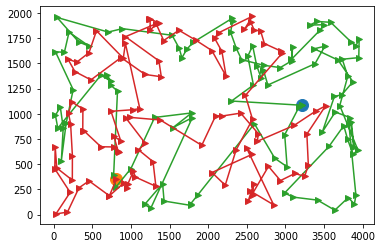

In [26]:
plt.clf()
plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")

In [216]:
#-------------calculating possible moves
mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
combinations = mesh.T.reshape(-1, 2)
possible_moves={'external': combinations}
mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
combinations = mesh.T.reshape(-1, 2)
possible_moves['internal']=combinations
#-------------------finished calculating possible moves

In [206]:
possible_moves

{'internal': [array([151,  77]),
  array([151,   8]),
  array([151, 162]),
  array([151,  99]),
  array([151, 141]),
  array([151, 179]),
  array([151, 155]),
  array([151,  35]),
  array([151, 100]),
  array([151,  59]),
  array([151, 192]),
  array([151, 122]),
  array([151,  76]),
  array([151, 168]),
  array([151,  53]),
  array([151,  12]),
  array([151,  31]),
  array([151,   6]),
  array([151,  50]),
  array([151, 154]),
  array([151, 128]),
  array([151, 129]),
  array([151, 106]),
  array([151,  79]),
  array([151,  29]),
  array([151,  20]),
  array([151, 145]),
  array([151, 134]),
  array([151, 185]),
  array([151, 126]),
  array([151, 182]),
  array([151, 180]),
  array([151,  64]),
  array([151,  55]),
  array([151,  87]),
  array([151,   7]),
  array([151, 102]),
  array([151, 170]),
  array([151,  70]),
  array([151,  71]),
  array([151, 101]),
  array([151,  22]),
  array([151, 159]),
  array([151, 108]),
  array([151,  46]),
  array([151,  63]),
  array([151, 116]),
 

In [90]:
cI = 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
inA=np.where(cycles[cI] == edge1)[0][0]
inB=np.where(cycles[cI] == edge2)[0][0]

In [91]:
inA

11

In [106]:
tab = np.array([[0,0], [1,0], [2,9]])

In [105]:
x = np.array([[0,0], [1,0], [2,9]])
x[x[:,0]!=x[:,1]]

array([[1, 0],
       [2, 9]])

In [111]:
[x for x in tab if x[0]!=x[1]]

[array([1, 0]), array([2, 9])]

[(array([0, 0]), array([0, 0])),
 (array([1, 0]), array([1, 0])),
 (array([2, 9]), array([2, 9]))]

  0%|          | 0/3 [00:00<?, ?it/s]

RANDOM_- steep_search_LM Switch- <function change_edges at 0x7fab6939a7b8> Init_random- False Dataset- kroa; time_mean:132.90099024772644,  time_min:113.0619056224823, time_max:157.41943311691284, min:40908.91509034166, max:41197.90194102761, mean:41015.23960071638


100%|██████████| 3/3 [06:55<00:00, 138.55s/it]


RANDOM_- steep_search_LM Switch- <function change_edges at 0x7fab6939a7b8> Init_random- False Dataset- krob; time_mean:138.5536344051361,  time_min:127.46117353439331, time_max:152.0145881175995, min:39104.26952586946, max:46564.042109150985, mean:41801.16035709077


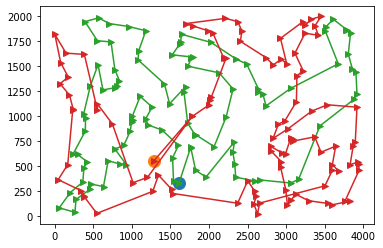

In [57]:
# uruchomienie najlepszego czystego steepest (Heuristic+Steep+Change edges)


dataset_choice = "kroa"
search = steep_search_LM
switch = change_edges


for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
        
    timeTable = []
    distanceTable = []
    cyclesTable = []
    bestDistance = 0
    for _ in tqdm(range(N)):
        startTime = time()
        cycles, bestDistance = search(dist, dataset, 60, switch=switch)
        distanceTable.append(bestDistance)
        cyclesTable.append(cycles)
        timeTable.append(time() - startTime)
    print(f"RANDOM_- {search.__name__} Switch- {switch} Init_random- {init_random} Dataset- {dataset_choice}; time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")

    plt.savefig(f'RANDOM_best_NN_{search.__name__}_random{init_random}_{switch}_{dataset_choice}.png')

  0%|          | 0/100 [00:00<?, ?it/s]

RANDOM_- steep_search_LM Switch- <function change_edges at 0x7fab6939a7b8> Dataset- kroa; time_mean:135.45464809417726,  time_min:94.66594958305359, time_max:184.50458550453186, min:37649.700443934096, max:48943.4428944301, mean:41617.00084190144


100%|██████████| 100/100 [3:32:06<00:00, 127.27s/it] 


RANDOM_- steep_search_LM Switch- <function change_edges at 0x7fab6939a7b8> Dataset- krob; time_mean:127.26687500715256,  time_min:96.25113677978516, time_max:165.17332220077515, min:37438.78336168473, max:47537.80353997077, mean:41217.36835406046


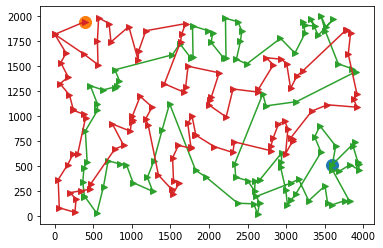

In [60]:
# uruchomienie najlepszego czystego steepest (Heuristic+Steep+Change edges)

N = 100
dataset_choice = "kroa"
search = steep_search_LM
switch=change_edges

for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
        
    timeTable = []
    distanceTable = []
    cyclesTable = []
    bestDistance = 0
    for _ in tqdm(range(N)):
        startTime = time()
        cycles, bestDistance = search(dist, dataset, 60, switch=switch)
        distanceTable.append(bestDistance)
        cyclesTable.append(cycles)
        timeTable.append(time() - startTime)
    print(f"RANDOM_- {search.__name__} Switch- {switch} Dataset- {dataset_choice}; time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")
    with open(f"{dataset_choice}_steep_search_Results.txt","w") as f:
        f.write(f"{search.__name__} Switch- {switch} Dataset- {dataset_choice}; time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}\n")

    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")

    plt.savefig(f'RANDOM_best_NN_{search.__name__}_{switch}_{dataset_choice}.png')

# 4 - Steepest search z ruchami kandydackimi